In [2]:
conda install -c anaconda python

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda3\envs\Arshad

  added / updated specs:
    - python


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       haa95532_0         163 KB  anaconda
    certifi-2021.10.8          |   py38haa95532_2         156 KB  anaconda
    openssl-1.1.1n             |       h2bbff1b_0         5.8 MB  anaconda
    python-3.8.13              |       h6244533_0        19.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:        25.9 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl              pkgs/main::openssl-1.1.1o-h2bbff

In [3]:
conda --version

conda 4.12.0

Note: you may need to restart the kernel to use updated packages.



Note: you may need to restart the kernel to use updated packages.



PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\Anaconda3\envs\Arshad
  package name: jupyter




In [9]:
conda update --all

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install open3d

In [2]:
!pip install -U jupyter

In [52]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
from matplotlib import pyplot as plt

In [21]:
import open3d as o3d
import numpy as np
import copy
# installing library packages

In [5]:
print(o3d.__version__)

0.15.1


In [29]:
epc = o3d.data.EaglePointCloud()

In [30]:
# Reading Eagle pointcloud data
pcd = o3d.io.read_point_cloud(epc.path)
print(pcd)

PointCloud with 796825 points.


In [31]:
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

[[ 1.65400004 -1.46826994 -0.31431001]
 [ 1.50960004 -1.35871005 -0.21705499]
 [ 1.53243995 -1.37502003 -0.25441799]
 ...
 [-0.59143698  6.5634799  -0.80171502]
 [-0.62709498  6.5717802  -0.80512601]
 [ 1.90862     2.78765988  4.23962021]]


In [32]:
print(epc.path)

C:\Users\mrg21-021411143/open3d_data/extract/EaglePointCloud/EaglePointCloud.ply


In [13]:
#Reading KnotMesh Poincloud 
KM = o3d.data.KnotMesh()
pcd1 = o3d.io.read_point_cloud(KM.path)
print(pcd1)

PointCloud with 1440 points.


In [11]:
print(np.asarray(pcd1.points))
o3d.visualization.draw_geometries([pcd1])

[[  4.51268387  28.68865967 -76.55680847]
 [  7.63622284  35.52046967 -69.78063965]
 [  6.21986008  44.22465134 -64.82303619]
 ...
 [-22.12651634  31.28466606 -87.37570953]
 [-13.91188431  25.4865818  -86.25827026]
 [ -5.27768707  23.36245346 -81.43279266]]


In [12]:
o3d.visualization.draw_geometries([pcd, pcd1])

In [14]:
# Surface normal estimation
mesh = o3d.io.read_triangle_mesh(KM.path)
print(mesh)
mesh.compute_vertex_normals()

TriangleMesh with 1440 points and 2880 triangles.


TriangleMesh with 1440 points and 2880 triangles.

In [33]:
epc_mesh = o3d.io.read_triangle_mesh(epc.path)
print(epc_mesh)
epc_mesh.compute_vertex_normals()

[Open3D WARNING] geometry::TriangleMesh appears to be a geometry::PointCloud (only contains vertices, but no triangles).
TriangleMesh with 796825 points and 0 triangles.


TriangleMesh with 796825 points and 0 triangles.

In [15]:
print(mesh)
print('Vertices:')
print(np.asarray(mesh.vertices))
print('Triangles:')
print(np.asarray(mesh.triangles))

TriangleMesh with 1440 points and 2880 triangles.
Vertices:
[[  4.51268387  28.68865967 -76.55680847]
 [  7.63622284  35.52046967 -69.78063965]
 [  6.21986008  44.22465134 -64.82303619]
 ...
 [-22.12651634  31.28466606 -87.37570953]
 [-13.91188431  25.4865818  -86.25827026]
 [ -5.27768707  23.36245346 -81.43279266]]
Triangles:
[[   0   12   13]
 [   0   13    1]
 [   1   13   14]
 ...
 [1438   11 1439]
 [1439   11    0]
 [1439    0 1428]]


In [16]:
# Visualize a 3D mesh
# Computing normal and rendering it

print(str(mesh.has_vertex_normals())+str(mesh.has_vertex_colors()))
o3d.visualization.draw_geometries([mesh])

# Actual code for the same
"""print("Try to render a mesh with normals (exist: " +
      str(mesh.has_vertex_normals()) + ") and colors (exist: " +
      str(mesh.has_vertex_colors()) + ")")
o3d.visualization.draw_geometries([mesh])
print("A mesh with no normals and no colors does not look good.")"""

TrueFalse


'print("Try to render a mesh with normals (exist: " +\n      str(mesh.has_vertex_normals()) + ") and colors (exist: " +\n      str(mesh.has_vertex_colors()) + ")")\no3d.visualization.draw_geometries([mesh])\nprint("A mesh with no normals and no colors does not look good.")'

In [22]:
# Cropping the mesh - Make a partial mesh of only the first half triangles
mesh1 = copy.deepcopy(mesh)
mesh1.triangles = o3d.utility.Vector3iVector(
    np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :])
mesh1.triangle_normals = o3d.utility.Vector3dVector(
    np.asarray(mesh1.triangle_normals)[:len(mesh1.triangle_normals) // 2, :])
print(mesh1.triangles)
o3d.visualization.draw_geometries([mesh1])

std::vector<Eigen::Vector3i> with 1440 elements.
Use numpy.asarray() to access data.


In [23]:
# Painting the mesh 
mesh1.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([mesh1])

In [7]:
# Reading Redwood Dataset
redwood_rgbd = o3d.data.SampleRedwoodRGBDImages()
color_raw = o3d.io.read_image(redwood_rgbd.color_paths[0])
depth_raw = o3d.io.read_image(redwood_rgbd.depth_paths[0])
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
print(rgbd_image)

#The converted images can be rendered as numpy arrays.

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


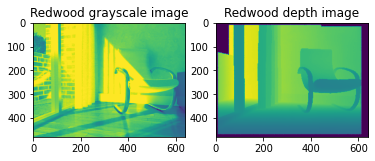

In [8]:
# plot the redwood image as grayscale and depth
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [10]:
# Creating pointcloud data from RGBD images
pcd_rgbd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, o3d.camera.PinholeCameraIntrinsic
                                                          (o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd_rgbd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd_rgbd])